__Importing CSV Files__

In [321]:
import pandas as pd
import numpy as np
%matplotlib inline

df_data=pd.read_csv(r'C:\Users\arshad\Downloads\Python Assignment 2\playstore-analysis (2) (1).csv')
print(df_data)
print('\n ----------------------------------------------------------------- \n')


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



__Getting columns of Dataframe and Data Shape__

In [322]:
print("Columns of dataframe are \n\n ",df_data.columns)
print("\n Shape of the data is ",df_data.shape)
print('\n-----------------------------------------------------\n')

Columns of dataframe are 

  Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

 Shape of the data is  (10841, 13)

-----------------------------------------------------



# Task 1

___Data Clean Up - Missing Value treatment___

__(1.a) Dropping records where Ratting is missing since Rating is our Target or Study Variable__


In [323]:
print("\nNull values in Rating : ",df_data['Rating'].isnull().sum())

df_data.dropna(subset=['Rating'],inplace=True)

print("\nChecking again Null Values - ",df_data['Rating'].isnull().sum())

print("\nAfter droping the null value shape of the data is ",df_data.shape)

# Resetting the Index

df_data=df_data.reset_index(drop=True)

df_data.head()

print("\n_______________________________________________________________________________\n")


Null values in Rating :  1474

Checking again Null Values -  0

After droping the null value shape of the data is  (9367, 13)

_______________________________________________________________________________



__(1.b) Check the null values for ALL Column and And_ver Column__


In [324]:
print("printing null values in each and every column")

Null_Columns=df_data.isnull().sum()

print(Null_Columns)

print("\n \n printing only Android Ver Null Columns ", df_data['Android Ver'].isnull().sum())

print("\n___________________________________________________________________\n")

printing null values in each and every column
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

 
 printing only Android Ver Null Columns  3

___________________________________________________________________



__All the  records having the samme problem__


In [325]:
print("Printing only those Row of Android Ver column Which are Vacant ")

Andrd_null=df_data[df_data['Android Ver'].isna()] # printing only Android Ver columns rows which are vacant

print(Andrd_null)

print("\n \n Are all three having the same problem  : Yes all this 3 records contain NaN Value \n")

print("\n___________________________________________________________________\n")


Printing only those Row of Android Ver column Which are Vacant 
                                          App         Category  Rating  \
4280                   [substratum] Vacuum: P  PERSONALIZATION     4.4   
4308                     Pi Dark [substratum]  PERSONALIZATION     4.5   
9117  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

     Reviews          Size Installs  Type     Price Content Rating  \
4280     230  11000.000000   1,000+  Paid     $1.49       Everyone   
4308     189   2100.000000  10,000+  Free         0       Everyone   
9117    3.0M  21516.529524     Free     0  Everyone            NaN   

                 Genres    Last Updated Current Ver Android Ver  
4280    Personalization   July 20, 2018         4.4         NaN  
4308    Personalization  March 27, 2018         1.1         NaN  
9117  February 11, 2018          1.0.19  4.0 and up         NaN  

 
 Are all three having the same problem  : Yes all this 3 records contain NaN Value 


_____

__Not an  Assignment Question  PLease Ignore__

df=df_data[df_data.isna().any(axis=1)] its prints all the rows which are vacant

print(df)


___print(Andrd_null.iloc[2]) #used to acees data of particular location___

print("\n\n")

print("Dropping 3rd record ") 

Andrd_null=Andrd_null.drop(Andrd_null.index[2]) # Drop based on index 

___if we print Andrd_null.index[2] it will print only the index value 10472__

#print(Andrd_null)

___________________________________________________________________________



__Drop the 3rd records ie record for "life made wifi"___

In [326]:

# For a particular Row to drop used (df_index[])

df_data = df_data.drop(df_data.index[9117])

Rem_data=df_data[df_data['Android Ver'].isna()]

print("\n After Dropping the 3rd recoreds the remaining TWO records are \n ",Rem_data)


print("\n _______________________________________________________________________\n")



 After Dropping the 3rd recoreds the remaining TWO records are 
                           App         Category  Rating Reviews     Size  \
4280  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   
4308    Pi Dark [substratum]  PERSONALIZATION     4.5     189   2100.0   

     Installs  Type  Price Content Rating           Genres    Last Updated  \
4280   1,000+  Paid  $1.49       Everyone  Personalization   July 20, 2018   
4308  10,000+  Free      0       Everyone  Personalization  March 27, 2018   

     Current Ver Android Ver  
4280         4.4         NaN  
4308         1.1         NaN  

 _______________________________________________________________________



__Fiiling Remaining 2 Missing Value with mode__

In [327]:
df_data['Android Ver']=df_data['Android Ver'].fillna(df_data['Android Ver'].mode()[0])

print("Null Values in Android Ver Columnm :",df_data['Android Ver'].isnull().sum())

print(" \n \n As we can see that above that the Android ver column Contains no null value Because we have fill That null value with mode ")


Null Values in Android Ver Columnm : 0
 
 
 As we can see that above that the Android ver column Contains no null value Because we have fill That null value with mode 


# Task 2

__2.a__

__WHich all variable need to be brought to numeric types ?__

__Numeric means Float Integer or Complex__


In [328]:
print(df_data.describe())

print("\nWHich all variable need to be brought to numeric types ?")

print("\nAs we can see Rating and Size are by-default Numeric")

print("\nAns ---  Review, Installs, Price columns can be Brought to Numeric") 

print("\n _____________________________________________________________________\n")

df_data.dtypes


            Rating           Size
count  9366.000000    9366.000000
mean      4.191757   22705.733753
std       0.515219   21305.040123
min       1.000000       8.500000
25%       4.000000    6600.000000
50%       4.300000   21000.000000
75%       4.500000   27000.000000
max       5.000000  100000.000000

WHich all variable need to be brought to numeric types ?

As we can see Rating and Size are by-default Numeric

Ans ---  Review, Installs, Price columns can be Brought to Numeric

 _____________________________________________________________________



App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

__2.b__

__Price Variable - Remove $ Sign and Convert to Float__

___There's an Inbuild Panda Function called pd.to_numeric to convert data type to int or float___


In [329]:
#pd.set_option("Display.max_rows",None)

#print(df_data['Price'])


print("Beefore the data type of Column is - " , df_data.dtypes['Price'])

df_data['Price']=df_data['Price'].str.replace('$',"",regex=True)  # here if we use \w instead of $ it will remove all Special Characters from the column

# if once used the above statement comment it after so that errors dont explode ---  Used only once

print("$ Removed")

#df_data['Price']=df_data['Price'].apply('pd.to_numeric',errors="coerce")

#df_data['Price']=pd.to_numeric(df_data['Price'],errors='coerce')

df_data['Price']=df_data['Price'].astype(float)

#print("After the data type os Column Price is - ",df_data.dtypes['Price'])

print(df_data['Price'])

print("\n ___________________________________________________________________________\n")

Beefore the data type of Column is -  object
$ Removed
0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
5         0.00
6         0.00
7         0.00
8         0.00
9         0.00
10        0.00
11        0.00
12        0.00
13        0.00
14        0.00
15        0.00
16        0.00
17        0.00
18        0.00
19        0.00
20        0.00
21        0.00
22        0.00
23        0.00
24        0.00
25        0.00
26        0.00
27        0.00
28        0.00
29        0.00
30        0.00
31        0.00
32        0.00
33        0.00
34        0.00
35        0.00
36        0.00
37        0.00
38        0.00
39        0.00
40        0.00
41        0.00
42        0.00
43        0.00
44        0.00
45        0.00
46        0.00
47        0.00
48        0.00
49        0.00
50        0.00
51        0.00
52        0.00
53        0.00
54        0.00
55        0.00
56        0.00
57        0.00
58        0.00
59        0.00
60        0.00
61        0.00
62        0.00


__2.c__

__Installs - Remove ',' and '+' sign, convert to Integer__


In [330]:
df_data['Installs']=df_data['Installs'].str.replace('\W','')

#df_data['Installs']=df_data['Installs'].str.replace('+','',regex=True)

print("\nRemoved + and , from Column Installs \n",df_data['Installs'])

print("\nBefore the data types of Column['Installs'] - ",df_data.dtypes['Installs'])

# we cant convert Column directly to int ---> First we need to convert to float -->drop the null Values and then convert to int

df_data['Installs']=df_data['Installs'].apply(pd.to_numeric,downcast='integer')

print("\nConverted Data types to int : ",df_data.dtypes['Installs'])

print("\n_______________________________________________________________________________________\n")


Removed + and , from Column Installs 
 0            10000
1           500000
2          5000000
3         50000000
4           100000
5            50000
6            50000
7          1000000
8          1000000
9            10000
10         1000000
11         1000000
12        10000000
13          100000
14          100000
15            5000
16          500000
17           10000
18         5000000
19        10000000
20          100000
21          100000
22          500000
23           50000
24           10000
25          500000
26          100000
27           10000
28          100000
29          100000
30           50000
31          100000
32          100000
33           10000
34          100000
35          500000
36         5000000
37           10000
38          500000
39           10000
40          100000
41        10000000
42          100000
43           10000
44        10000000
45          100000
46          100000
47          100000
48          100000
49         1000000
50        

__# Convert all Identified Column to Numeric__

In [331]:
print("Before Data types Of Every Column : \n\n",df_data.dtypes)

print("Above We have Converted Installs Price Rating to Numeric ")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_data[['Reviews','Size']]=df_data[['Reviews','Size']].apply(pd.to_numeric,downcast='integer')

print("After Data types Of Every Column : \n\n",df_data.dtypes)


Before Data types Of Every Column : 

 App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object
Above We have Converted Installs Price Rating to Numeric 
After Data types Of Every Column : 

 App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [332]:
df_data.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,9.366000e+03,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,22705.733753,1.789744e+07,0.960928
std,0.515219,3.144042e+06,21305.040123,9.123822e+07,15.816585
min,1.000000,1.000000e+00,8.500000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


# Task 3

__Sanity Checks__

__Avg rating should be betwwen 1 and 5  as only these values are allowed on the play store__

__Are there any records Drop if so__

In [333]:
print(df_data['Rating'].unique())

[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  4.8 4.9 3.6 3.7 3.3 3.4 3.5
 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6 2.1
 1.4 1.5 1.2]


In [334]:


#df_data['Rating']=df_data['Rating'].astype(int)

print("\nData Shape Brfore ",df_data.shape)

df_data=df_data[df_data['Rating'].between(1,5)] # showing all records which have rating between 1 and 5.. and dropping records which are not

print("\nData Shape After" ,df_data.shape)

print("\nFrom the data shape we get to know that only one value is not in range of o-5")

print("As we see in the ABOVE cell df_data.unique contains all unique all between 1 to 5")

print("\n ________________________________________________________________________\n")


Data Shape Brfore  (9366, 13)

Data Shape After (9366, 13)

From the data shape we get to know that only one value is not in range of o-5
As we see in the ABOVE cell df_data.unique contains all unique all between 1 to 5

 ________________________________________________________________________



__# Review should not be more than installs are only those who installed can review the app__


In [335]:
df_data=df_data[df_data['Reviews'] < df_data['Installs']]

df_data=df_data.reset_index(drop=True)

#print(df_data[['Reviews','Installs']])

#print("\n ________________________________________________________________________\n")


# Task 4


__Identify the handle the outliers__

__Price Column___

__Make suitable plot to Identify Outliers__

before data types of price is  : float64
After data types of Price is  int64


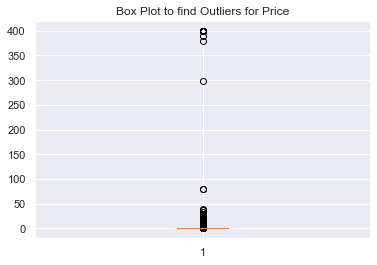

In [336]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

#print(df_data['Price'])

print("before data types of price is  :", df_data.dtypes['Price'])

df_data.dropna(subset=['Price'],inplace=True)

df_data=df_data.reset_index(drop=True)

df_data['Price']=df_data['Price'].astype('int64')

print("After data types of Price is ", df_data.dtypes['Price'])

#print(df_data['Price'])

import matplotlib.pyplot as plt

plt.boxplot(df_data['Price'])

plt.title("Box Plot to find Outliers for Price")

plt.show()

__do u expect apps on the playstore to cost $200__

__No let me Remove app which are  above $200__


In [337]:
df_data=df_data[df_data['Price']<200]

df_data=df_data.reset_index(drop=True)

print("Showing App Whose value is less dan 200 \n")

print(df_data.shape)

#print(df_data['Price'])




Showing App Whose value is less dan 200 

(9342, 13)


__After dropping the useless records, make the suitable plot again to identify outlier__

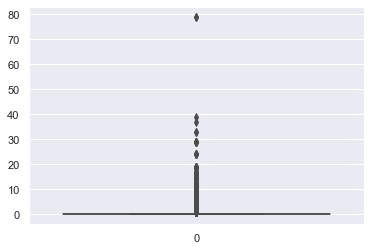

In [338]:
import seaborn as sns
sns.boxplot(data=df_data['Price'])

__Limit data to records with price < $30__

In [339]:
df_data=df_data[df_data['Price'] < 30]

df_data=df_data.reset_index(drop=True)

df_data.shape


(9336, 13)

__b. Reviews column__

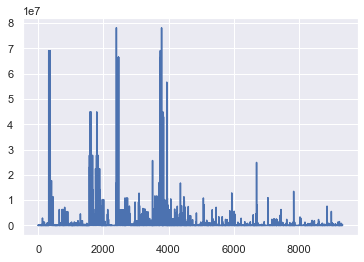

In [340]:
sns.lineplot(data=df_data['Reviews']);

__Limit data to apps with < 1 Million reviews__

In [341]:
df_data=df_data[df_data['Reviews']<1000000]

df_data=df_data.reset_index(drop=True)

print(df_data.head())


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free      0       Everyone   
1      967  14000.0    500000  Free      0       Everyone   
2    87510   8700.0   5000000  Free      0       Everyone   
3   215644  25000.0  50000000  Free      0           Teen   
4      967   2800.0    100000  Free      0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Des

__What is the 95th percentile of the installs?__

In [342]:
prcntil=df_data['Installs'].quantile(.95)
print(prcntil)

10000000.0


__Drop records having a value more than the 95th percentile__

In [343]:
df_data=df_data[df_data['Installs']< prcntil]

print(df_data.shape)

(7256, 13)


# Data analysis to answer business question

In [344]:
df_data.reset_index(drop=True)

print(len(df_data))

df_data.count()

7256


App               7256
Category          7256
Rating            7256
Reviews           7256
Size              7256
Installs          7256
Type              7256
Price             7256
Content Rating    7256
Genres            7256
Last Updated      7256
Current Ver       7252
Android Ver       7256
dtype: int64


__What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?__

-1.638194939309568


<IPython.core.display.Javascript object>


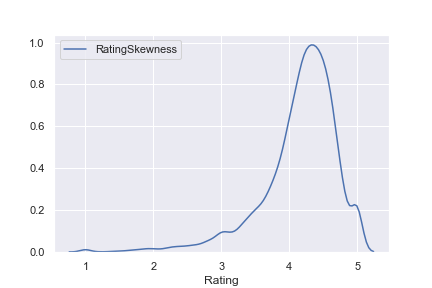

In [348]:
skewvalue=df_data['Rating'].skew(axis=0)
print(skewvalue)

#print("Here the Skewness is in Negative Indicates an Asymmetry in the distribution and the tail is larger towards left hand side of the distribution")

%matplotlib notebook
import seaborn as sns

sns.distplot(df_data['Rating'],hist=False,label="RatingSkewness")

#df_data['Rating'].plot(kind='density')


__How do u Explain This__


Here the Skewness is in Negative Indicates an Asymmetry in the distribution and the tail is larger towards left hand side of the distribution


__What is the Implication of this on your analysis__

From this implication i found that most of the people give rating between 3.5 to 4.8 and there are very few people who give rating below 2.


__What are the top content Rating values ?__


In [349]:
df_data['Content Rating'].value_counts()

Everyone           5911
Teen                746
Mature 17+          346
Everyone 10+        249
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

The Top Contents of rating are .. Everyone , Teen , Mature 17 , Everyone 10+ 


__a. Are there any values with very few records?__

Yes ther are  Category like -- Adults only 18+ and unrated have very few records

__b. If yes, drop those as they won’t help in the analysis__

In [350]:
print("bedore dropping ",df_data.shape)

bedore dropping  (7256, 13)


In [360]:
print(df_data.shape)


df_data=df_data[df_data['Content Rating']!="Adults only 18+"]
df_data=df_data[df_data['Content Rating']!="Unrated"]


df_data.reset_index(drop=True,inplace=True)

print(df_data.shape)


(7256, 13)
(7252, 13)


__7. Effect of size on rating__

<IPython.core.display.Javascript object>


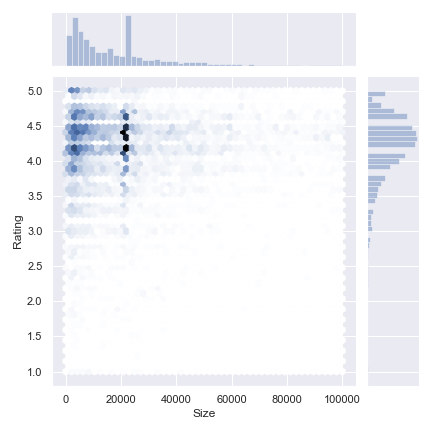

In [351]:
sns.jointplot(x='Size',y='Rating',data=df_data,kind='hex');
              

__b. Do you see any patterns ?__

__Yes__

__c. How do you explain the pattern?__

From the Above pattern  we can see that people give more rating when we size is between 0 to 20000 

we can also say that as the size increases the number of people who gives rating decreases




__8. Effect of price on rating__

Make a jointplot (with regression line)

<IPython.core.display.Javascript object>


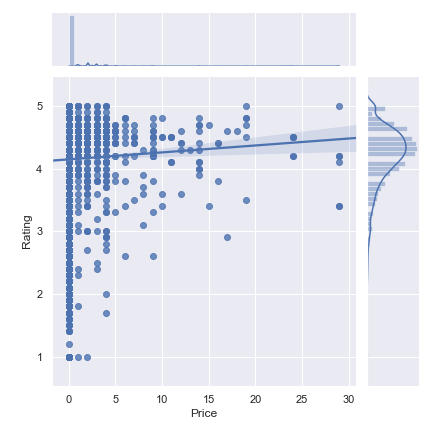

In [352]:

sns.jointplot(x='Price',y='Rating',data=df_data,kind='reg');


__What pattern do you see?__
 
 Asymmetrical patter with Outliers and more Skewedd towards left
 
 

__How do you explain the pattern?__

If the price is between 0 to 5 the Rating does not get effected (Remain as it is ) As the price increase above 5 the rating    starts increses with very minimum change. 

The Rating increases when the price is between 5 to 30 

And very less people gives rating if the price increases above 20
 

__d. Replot the data, this time with only records with price > 0__

In [353]:
Price_greater_than_0=df_data[df_data['Price']>0]
#df_data.reset_index(drop=True,inplace=True)
Price_greater_than_0

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
218,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.000000,100000,Paid,4,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
219,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.000000,100000,Paid,4,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
274,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.000000,100000,Paid,4,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
275,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.000000,100000,Paid,4,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
368,Puffin Browser Pro,COMMUNICATION,4.0,18247,21516.529524,100000,Paid,3,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
406,"Moco+ - Chat, Meet People",DATING,4.2,1545,21516.529524,10000,Paid,3,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
407,Calculator,DATING,2.6,57,6200.000000,1000,Paid,6,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
408,AMBW Dating App: Asian Men Black Women Interra...,DATING,3.5,2,17000.000000,100,Paid,7,Mature 17+,Dating,"January 21, 2017",1.0.1,4.0 and up
498,"Moco+ - Chat, Meet People",DATING,4.2,1546,21516.529524,10000,Paid,3,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
733,Sago Mini Hat Maker,EDUCATION,4.9,11,63000.000000,1000,Paid,3,Everyone,Education;Pretend Play,"July 24, 2017",1.0,4.0.3 and up


In [354]:
df_data.shape

(7256, 13)

<IPython.core.display.Javascript object>


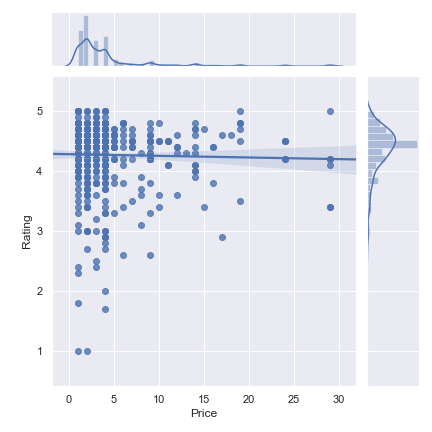

In [355]:
sns.jointplot(x='Price',y='Rating',data=Price_greater_than_0,kind='reg');

__Does the pattern change?__


Yes, when we take price greater than zero the regression line goes up to 4.3 rating and when  the price is 30 the rating falls to by 0.1 i.e (4.2).
Where as in above case the the rating increases with increase in price but here the rating decreases with increases in price



__What is your overall inference on the effect of price on the rating__?

    Hence from the overall Interference we conclude that  most of the people rate when the price is in negative (means App which are free) 

More People gives Rating when the apps are free

__9. Look at all the numeric interactions together –__

__a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price__

<IPython.core.display.Javascript object>


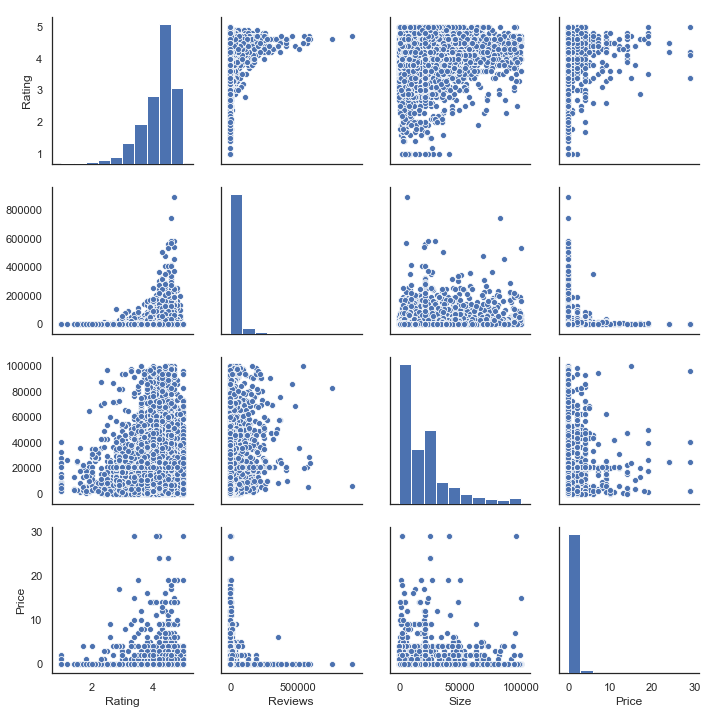

In [357]:
sns.set(style="white",color_codes=True)
sns.pairplot(data=df_data[['Rating','Reviews','Size','Price']])

__10.Rating vs. content rating__

__a. Make a bar plot displaying the rating for each content rating__

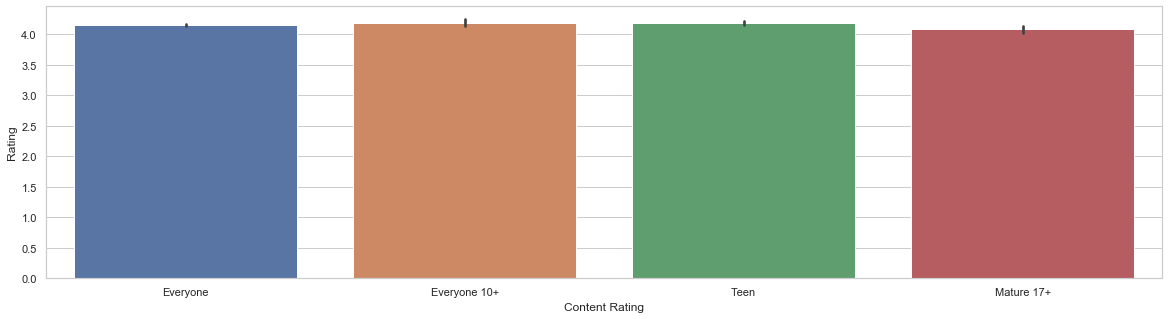

In [279]:
%matplotlib inline
plt.figure(figsize=(20,5))
sns.set(style="whitegrid")
sns.barplot(x='Content Rating',y='Rating',data=df_data);


In [280]:
df_data[['Rating','Content Rating']]

,Rating,Content Rating
0,4.1,Everyone
1,3.9,Everyone
2,4.7,Everyone
3,4.3,Everyone
4,4.4,Everyone
5,3.8,Everyone
6,4.1,Everyone
7,4.4,Everyone
8,4.7,Everyone
9,4.4,Everyone


In [281]:
df_data['Rating'].skew()



-1.638002425167998

As we can see that the data is not sqew or symmetric so we'll take median here for better metric

MEDIAN -- when tha data is not symetric...Gives a middle value in which half of the data is above and half is below that metric

Mean --  when the data is Symmetric ..Gives an average value


In [282]:
df_data.groupby('Content Rating')['Rating'].median()

Content Rating
Everyone        4.3
Everyone 10+    4.3
Mature 17+      4.2
Teen            4.2
Name: Rating, dtype: float64

<IPython.core.display.Javascript object>


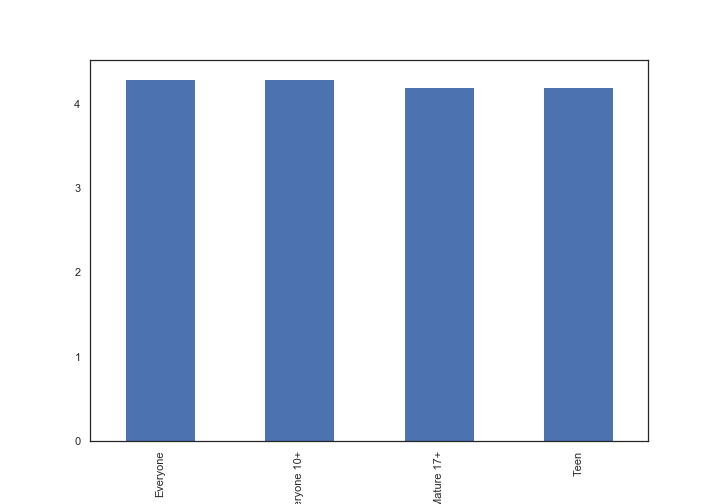

In [361]:
plt.figure(figsize=(10,7))
a=df_data.groupby('Content Rating')['Rating'].median()
a.plot(kind='bar')

   Number
0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
Number    0.0
dtype: float64


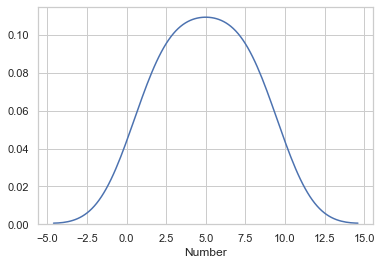

In [283]:
#  Rough Work

%matplotlib inline
a=[1,2,3,4,5,6,7,8,9]
a=pd.DataFrame(a,columns=['Number'])
print(a)
print(a.skew())

sns.distplot(a['Number'],hist=False);

__11. Content rating vs. size vs. rating – 3 variables at a time__

__a. Create 5 buckets (20% records in each) based on Size__

In [362]:
b=pd.qcut(df_data['Size'],q=5)
print(b.head())

0    (9800.0, 21516.53]
1    (9800.0, 21516.53]
2      (4100.0, 9800.0]
3       (8.499, 4100.0]
4      (4100.0, 9800.0]
Name: Size, dtype: category
Categories (5, interval[float64]): [(8.499, 4100.0] < (4100.0, 9800.0] < (9800.0, 21516.53] < (21516.53, 31000.0] < (31000.0, 100000.0]]


In [363]:
# same as above

a=pd.qcut(df_data['Size'],q=[0,0.2,0.4,0.6,0.8,1])
print(a.head())

0    (9800.0, 21516.53]
1    (9800.0, 21516.53]
2      (4100.0, 9800.0]
3       (8.499, 4100.0]
4      (4100.0, 9800.0]
Name: Size, dtype: category
Categories (5, interval[float64]): [(8.499, 4100.0] < (4100.0, 9800.0] < (9800.0, 21516.53] < (21516.53, 31000.0] < (31000.0, 100000.0]]


__b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination__

In [365]:
df_data['Size Buckets']=a
print(df_data['Size Buckets'])

0        (9800.0, 21516.53]
1        (9800.0, 21516.53]
2          (4100.0, 9800.0]
3           (8.499, 4100.0]
4          (4100.0, 9800.0]
5        (9800.0, 21516.53]
6       (21516.53, 31000.0]
7       (31000.0, 100000.0]
8           (8.499, 4100.0]
9       (21516.53, 31000.0]
10       (9800.0, 21516.53]
11       (9800.0, 21516.53]
12      (31000.0, 100000.0]
13          (8.499, 4100.0]
14         (4100.0, 9800.0]
15       (9800.0, 21516.53]
16      (31000.0, 100000.0]
17       (9800.0, 21516.53]
18       (9800.0, 21516.53]
19         (4100.0, 9800.0]
20      (21516.53, 31000.0]
21         (4100.0, 9800.0]
22      (21516.53, 31000.0]
23         (4100.0, 9800.0]
24         (4100.0, 9800.0]
25         (4100.0, 9800.0]
26         (4100.0, 9800.0]
27         (4100.0, 9800.0]
28       (9800.0, 21516.53]
29       (9800.0, 21516.53]
30         (4100.0, 9800.0]
31         (4100.0, 9800.0]
32      (21516.53, 31000.0]
33       (9800.0, 21516.53]
34       (9800.0, 21516.53]
35         (4100.0, 

In [374]:
g=df_data.groupby(['Content Rating','Size Buckets'])['Rating'].transform (lambda x: pd.qcut(x,5,labels=False,duplicates='drop'))
print(g)
#print(df_data['Rating'])

0       1.0
1       0.0
2       4.0
3       2.0
4       2.0
5       0.0
6       1.0
7       2.0
8       4.0
9       2.0
10      2.0
11      3.0
12      2.0
13      0.0
14      4.0
15      3.0
16      2.0
17      1.0
18      1.0
19      4.0
20      4.0
21      4.0
22      4.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      3.0
29      1.0
30      4.0
31      0.0
32      4.0
33      1.0
34      4.0
35      1.0
36      1.0
37      3.0
38      1.0
39      1.0
40      3.0
41      1.0
42      2.0
43      2.0
44      1.0
45      0.0
46      3.0
47      1.0
48      2.0
49      4.0
50      2.0
51      1.0
52      1.0
53      1.0
54      3.0
55      4.0
56      2.0
57      3.0
58      4.0
59      1.0
60      1.0
61      2.0
62      0.0
63      1.0
64      4.0
65      0.0
66      4.0
67      4.0
68      3.0
69      3.0
70      4.0
71      3.0
72      4.0
73      1.0
74      2.0
75      1.0
76      2.0
77      0.0
78      2.0
79      2.0
80      0.0
81      3.0
82      3.0
83  

In [375]:
df_data.groupby(['Content Rating','Size Buckets'])['Rating'].sum()

Content Rating  Size Buckets       
Everyone        (8.499, 4100.0]        5478.9
                (4100.0, 9800.0]       5127.9
                (9800.0, 21516.53]     7286.2
                (21516.53, 31000.0]    2468.2
                (31000.0, 100000.0]    4153.7
Everyone 10+    (8.499, 4100.0]          48.5
                (4100.0, 9800.0]        117.5
                (9800.0, 21516.53]      308.3
                (21516.53, 31000.0]     163.1
                (31000.0, 100000.0]     406.5
Mature 17+      (8.499, 4100.0]         106.8
                (4100.0, 9800.0]        317.4
                (9800.0, 21516.53]      444.8
                (21516.53, 31000.0]     215.7
                (31000.0, 100000.0]     326.8
Teen            (8.499, 4100.0]         318.6
                (4100.0, 9800.0]        485.2
                (9800.0, 21516.53]      957.5
                (21516.53, 31000.0]     347.3
                (31000.0, 100000.0]    1014.7
Name: Rating, dtype: float64

__Make a heatmap__

__Annotated__

<IPython.core.display.Javascript object>


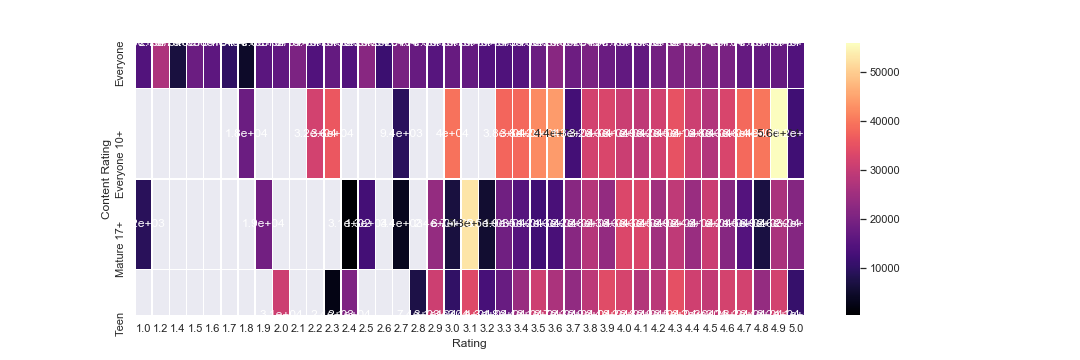

In [384]:
sns.set()

fig_dims=(15,5)

b=df_data.pivot_table(values='Size',index='Content Rating',columns='Rating')

fig,ax=plt.subplots(figsize=fig_dims)
sns.heatmap(b,annot=True,cmap='magma',linewidth=.5,ax=ax);

__Greens color map__

<IPython.core.display.Javascript object>


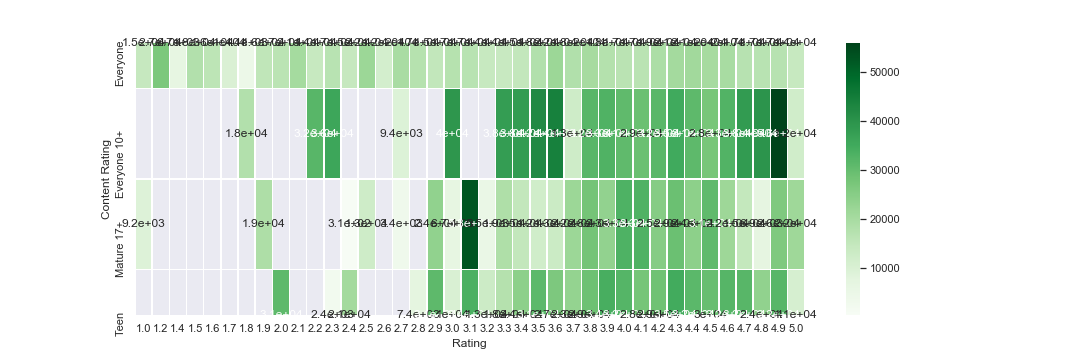

In [385]:

fig_dims=(15,5)

b=df_data.pivot_table(values='Size',index='Content Rating',columns='Rating')

fig,ax=plt.subplots(figsize=fig_dims)
sns.heatmap(b,annot=True,cmap='Greens',linewidth=.5,ax=ax)

__What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?__

Yes, Lighter app are prefered by All  Categories In Which the category Everyone has more number of Lighter apps 
The Heaviers apps are prefered by Teen and Mature 18
And apps having size from 0 to 6000 falls in all Categories 

In [291]:
# Rough Work


df_data['Size Buckets'].value_counts()

(9800.0, 21516.53]     2156
(4100.0, 9800.0]       1457
(8.499, 4100.0]        1454
(31000.0, 100000.0]    1417
(21516.53, 31000.0]     768
Name: Size Buckets, dtype: int64

In [292]:
df_data['Size Buckets'].describe(include='category')

count                   7252
unique                     5
top       (9800.0, 21516.53]
freq                    2156
Name: Size Buckets, dtype: object